We would like to compare the recipe recommendations made for a user based on Utility Matrix Factorization based collaborative filtering approaches and content-based recommendation approach

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# RAW recipes

In [2]:
raw_recipes = pd.read_csv("../data/RAW_recipes.csv")

In [3]:
print(len(raw_recipes))

231637


In [4]:
raw_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [5]:
raw_recipes.drop(['minutes','contributor_id','submitted','tags','nutrition','n_steps','steps'], axis=1, inplace = True)
raw_recipes.shape

(231637, 5)

In [6]:
raw_recipes.columns

Index(['name', 'id', 'description', 'ingredients', 'n_ingredients'], dtype='object')

# Raw interactions

In [7]:
raw_interactions = pd.read_csv('../data/RAW_interactions.csv')

In [8]:
print("Basic statistics about the data")
print("Shape: ", raw_interactions.shape)
print("Columns: ", raw_interactions.columns)
print("Sample data: ")
raw_interactions.tail(5)

Basic statistics about the data
Shape:  (1132367, 5)
Columns:  Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')
Sample data: 


,user_id,recipe_id,date,rating,review
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...
1132366,2001868099,78003,2017-12-18,5,I am so glad I googled and found this here. Th...


In [9]:
print("Distribution of ratings")
raw_interactions['rating'].value_counts()

Distribution of ratings


5    816364
4    187360
0     60847
3     40855
2     14123
1     12818
Name: rating, dtype: int64

<AxesSubplot:>

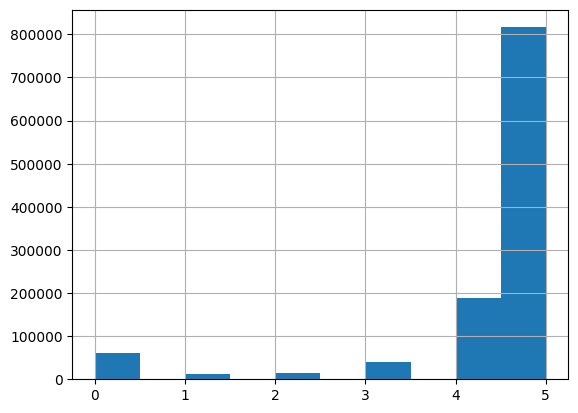

In [10]:
raw_interactions['rating'].hist()

In [11]:
M = raw_interactions['user_id'].nunique()
N = raw_interactions['recipe_id'].nunique()
print("Number of unique recipes: ", N)
print("Number of unique users: ", M)

Number of unique recipes:  231637
Number of unique users:  226570


## How is the average rating per recipe looking like ?

In [12]:
sns.set_theme(context='notebook', style='darkgrid', palette='pastel', font='sans-serif', font_scale=1, color_codes=True, rc=None)

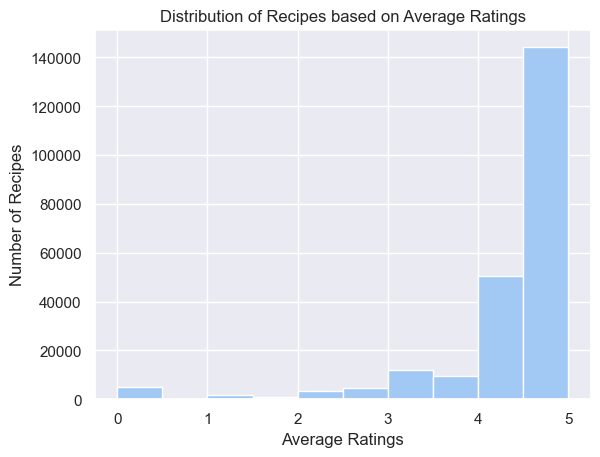

In [13]:
raw_interactions.groupby('recipe_id')['rating'].mean().reset_index().rating.plot(kind ='hist',title='Distribution of Recipes based on Average Ratings')
plt.xlabel("Average Ratings")
plt.ylabel("Number of Recipes")
plt.show()

Most of the recipes have average ratings of 5 and 4. Data seems highly biased. All recipes are good?

Try to summarize the interactions dataset for recipes with average rating for each recipe and the number of unique users who have rated it.

In [14]:
aggregation_strategy = {'rating' : ['mean'],'user_id' : ['nunique']}

In [15]:
recipe_interaction_summary = raw_interactions.groupby(['recipe_id']).agg(aggregation_strategy).reset_index()

In [16]:
recipe_interaction_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   (recipe_id, )       231637 non-null  int64  
 1   (rating, mean)      231637 non-null  float64
 2   (user_id, nunique)  231637 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 5.3 MB


Thus the interaction data of 231637 recipes have been summarized

In [17]:
recipe_interaction_summary.tail()

,recipe_id,rating,user_id
,,mean,nunique
231632,537459,5.0,1
231633,537485,5.0,1
231634,537543,0.0,1
231635,537671,0.0,1
231636,537716,5.0,1


In [18]:
recipe_interaction_summary.columns

MultiIndex([('recipe_id',        ''),
            (   'rating',    'mean'),
            (  'user_id', 'nunique')],
           )

The column index need to be adjusted

In [19]:
columns = pd.Index([c[0] + "_" +c[1] for c in recipe_interaction_summary.columns.tolist()])
recipe_interaction_summary.columns = columns
recipe_interaction_summary.columns

Index(['recipe_id_', 'rating_mean', 'user_id_nunique'], dtype='object')

How is the distribution of number of unique users who rated the recipes looking

In [20]:
recipe_interaction_summary.user_id_nunique.describe()

count    231637.000000
mean          4.888541
std          17.532481
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1613.000000
Name: user_id_nunique, dtype: float64

### Inorder to have a better comparison, would like to have only those recipes to be considered which have more than two users rating it

In [21]:
recipe_interaction_final = recipe_interaction_summary[(recipe_interaction_summary['user_id_nunique']>2)]

In [22]:
recipe_interaction_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94564 entries, 0 to 231607
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recipe_id_       94564 non-null  int64  
 1   rating_mean      94564 non-null  float64
 2   user_id_nunique  94564 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 2.9 MB


If we take recipes rated by more than two unique users, the number of recipes come down to 94564 Let's have a look at the distribution of average ratings

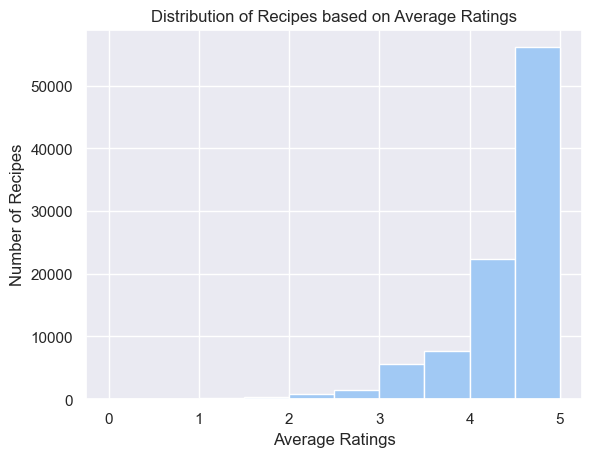

In [23]:
recipe_interaction_final.rating_mean.plot(kind ='hist',title='Distribution of Recipes based on Average Ratings')
plt.xlabel("Average Ratings")
plt.ylabel("Number of Recipes")
plt.show()

Need to use only the recipes filtered by our interaction dataset above. Trying to do a merge operation.

## Filter the Raw Recipes based on User interation

In [24]:
recipes = pd.merge(raw_recipes,recipe_interaction_final,right_on = ['recipe_id_'],left_on = ['id'] ,how = 'inner')

In [25]:
recipes.shape

(94564, 8)

In [26]:
recipes.columns

Index(['name', 'id', 'description', 'ingredients', 'n_ingredients',
       'recipe_id_', 'rating_mean', 'user_id_nunique'],
      dtype='object')

In [27]:
recipes.drop(['recipe_id_'], axis = 1,  inplace = True)

In [28]:
recipes.head()

,name,id,description,ingredients,n_ingredients,rating_mean,user_id_nunique
0,arriba baked winter squash mexican style,137739,autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,5.0,3
1,a bit different breakfast pizza,31490,this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,3.5,4
2,beat this banana bread,75452,from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9,4.4,5
3,better than sex strawberries,42198,simple but sexy. this was in my local newspape...,"['vanilla wafers', 'butter', 'powdered sugar',...",7,3.8,5
4,better then bush s baked beans,67547,i'd have to say that this is a labor of love d...,"['great northern bean', 'chicken bouillon cube...",13,3.9,10


Let's save this data as a pre-processed dataset

In [29]:
recipes.to_csv('dataset/pp_recipes.csv', index=False)

In [30]:
recipes.shape

(94564, 7)

In [31]:
raw_interactions.columns

Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')

Since our recipe dataset has been reduced by more than half, we need to consider only the user interaction on those recipes from the interaction data

In [32]:
raw_interactions_filtered = raw_interactions[raw_interactions['recipe_id'].isin(recipes['id'])]

In [33]:
raw_interactions_filtered.recipe_id.nunique()

94564

In [34]:
M = raw_interactions_filtered['user_id'].nunique()
N = raw_interactions_filtered['recipe_id'].nunique()

In [35]:
print("Utility Matrix dimensions: ", M, " * ", N)

Utility Matrix dimensions:  204665  *  94564


In [36]:
raw_interactions_filtered[['user_id', 'recipe_id','rating']].to_csv('dataset/pp_interactions.csv', index=False)

# Summary of pre-processing done so far

Summary of preprocessing done for interactions and recipe datasets
In the raw datasets
Number of unique recipes:  231,637
Number of unique users:  226,570
Upon considering only those recipes that were rated by atleast two users, the number of recipes came down to 94,564.
The number of users who interacted with these recipes where 204,665

# Matrix Factorization based Collaborative Filtering

In [37]:
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise import accuracy

In [38]:
ratings_df = pd.read_csv('dataset/pp_interactions.csv')

In [39]:
reader = Reader() 
data=Dataset.load_from_df(ratings_df,reader)

In [40]:
trainset = data.build_full_trainset()

In [41]:
svd = SVD()

In [42]:
svd.fit(trainset)

Let's try to predict ratings for the recipes, the users in our dataset haven't interacted with

Since the number of users and the number of recipes is too large. We would like to take up a subset of users and try to predict what kind of recipes they would like based on our CF model

## How to choose our test users

In [43]:
ratings_df.head()

,user_id,recipe_id,rating
0,52282,120345,4
1,124416,120345,0
2,2000192946,120345,2
3,76535,134728,4
4,273745,134728,5


In [44]:
# group the dataframe by user and count the number of unique recipes rated by each user
user_counts = ratings_df.groupby('user_id')['recipe_id'].nunique()
user_counts = user_counts.sort_values(ascending=False)


In [45]:
user_counts.describe()

count    204665.000000
mean          4.642582
std          39.112266
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        4130.000000
Name: recipe_id, dtype: float64

In [46]:
# filter the resulting dataframe to only include the users who have rated more than 2 items 
#We have 94564 unique recipes. How about we pick the users who have shown very good rating behavior.
at_least_some_recipes_rated = user_counts[(user_counts > 1000) & (user_counts < 1500)]

There are users who have interacted very well with data with upto 4K+ ratings given. But 75% of users have given only 2 ratings.
Let's pick the users who have rated between 1000 adn 1500 recipes.

In [47]:
# extract the user ids as a list
users_with_at_least_some_recipes_rated = at_least_some_recipes_rated.index.tolist()

In [48]:
len(users_with_at_least_some_recipes_rated)

37

In [49]:
# Build anti-test set for selected users
anti_testset = []
for user_id in users_with_at_least_some_recipes_rated:
    # Get list of item ids for items that user has not rated
    item_ids = [item_id for item_id in trainset.all_items() if not trainset.ur[user_id] or item_id not in trainset.ur[user_id]]
    # Add tuples to anti-test set
    anti_testset.extend([(user_id, item_id, trainset.global_mean) for item_id in item_ids])


In [50]:
predictions = svd.test(anti_testset)

In [51]:
type(predictions)

list

In [52]:
predictions[0]

Prediction(uid=39835, iid=0, r_ui=4.431151557504204, est=4.534910795189222, details={'was_impossible': False})

In [56]:
from collections import defaultdict

def getRecipeRecommendations(topN=5):
    top_recs = defaultdict(list
    for uid, iid, true_r, est, _ in predictions: 
        top_recs[uid].append((iid, est))
     
    for uid, user_ratings in top_recs.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_recs[uid] = user_ratings[:topN]
     
    return top_recs 

In [54]:
# Create a dictionary mapping recipe ids to names
recipe_dict = dict(zip(recipes['id'], recipes['name']))

In [62]:
def getRecipeName(recipe_id):
    if recipe_id not in recipe_dict:
        return ""
    m = recipe_dict[recipe_id]
    return m

In [63]:
def getRecipeRecommendationsForUser(u_id, recommendations):    
    recommended_recipes = recommendations[u_id]
    recipe_list = []
    for recipe in recommended_recipes:
        recipe_list.append((getRecipeName(recipe[0]),recipe[1]))
    return recipe_list  

In [66]:
users_with_at_least_some_recipes_rated[0]

39835

In [67]:
recommendations = getRecipeRecommendations()
getRecipeRecommendationsForUser(users_with_at_least_some_recipes_rated[0], recommendations)

[('black coffee barbecue sauce', 5),
 ('stuffed acorn squash', 5),
 ('texas style picante sauce', 5),
 ('gehaktballen  dutch meatballs', 5),
 ('low fat thai steak salad', 5)]

In [96]:
import csv
with open('cf_recommendations.csv','w') as fw:
    fieldnames = ['user_id','prediction1','prediction2','prediction3','prediction4','prediction5']
    writer = csv.DictWriter(fw, fieldnames)
    writer.writeheader()
    recommendations = getRecipeRecommendations()
    for i in range(len(users_with_at_least_some_recipes_rated)):        
        recipe_list = getRecipeRecommendationsForUser(users_with_at_least_some_recipes_rated[i], recommendations)
        writer.writerow({'user_id': users_with_at_least_some_recipes_rated[i],
                         'prediction1': recipe_list[0],
                         'prediction2': recipe_list[1],
                         'prediction3': recipe_list[2],
                         'prediction4': recipe_list[3],
                         'prediction5': recipe_list[4]
                        })

We want to make a file which has recipe ids instead of names, so that this can be further used in content based recommendation systems easily.

In [90]:
def getRecipeIdsForUser(u_id, recommendations):    
    recommended_recipes = recommendations[u_id]
    recipe_list = []
    for recipe in recommended_recipes:
        recipe_list.append(recipe[0])
    return recipe_list  

In [92]:
recommendations = getRecipeRecommendations()
getRecipeIdsForUser(users_with_at_least_some_recipes_rated[0], recommendations)

[66, 324, 1183, 1581, 4410]

In [95]:
import csv
with open('cf_recommendations_recipe_ids.csv','w') as fw:
    fieldnames = ['user_id','prediction1','prediction2','prediction3','prediction4','prediction5']
    writer = csv.DictWriter(fw, fieldnames)
    writer.writeheader()
    recommendations = getRecipeRecommendations()
    for i in range(len(users_with_at_least_some_recipes_rated)):        
        recipe_list = getRecipeIdsForUser(users_with_at_least_some_recipes_rated[i], recommendations)
        writer.writerow({'user_id': users_with_at_least_some_recipes_rated[i],
                         'prediction1': recipe_list[0],
                         'prediction2': recipe_list[1],
                         'prediction3': recipe_list[2],
                         'prediction4': recipe_list[3],
                         'prediction5': recipe_list[4]
                        })

# Content Based Recommendation System

### Based on the ingredient list of 94564 recipes

In [70]:
recipes = pd.read_csv('dataset/pp_recipes.csv')

In [71]:
recipes.shape

(94564, 7)

In [72]:
recipes.head()

,name,id,description,ingredients,n_ingredients,rating_mean,user_id_nunique
0,arriba baked winter squash mexican style,137739,autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,5.0,3
1,a bit different breakfast pizza,31490,this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,3.5,4
2,beat this banana bread,75452,from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9,4.4,5
3,better than sex strawberries,42198,simple but sexy. this was in my local newspape...,"['vanilla wafers', 'butter', 'powdered sugar',...",7,3.8,5
4,better then bush s baked beans,67547,i'd have to say that this is a labor of love d...,"['great northern bean', 'chicken bouillon cube...",13,3.9,10


We want to do an ingredient list wise similarity comparison between the recipes


### 1. Encode the ingredient list

In [73]:
import re
ingredient_list = [ingredient_list.split(',') for ingredient_list in recipes.ingredients]
ingredient_list = [item.strip() for sublist in ingredient_list for item in sublist]
ingredient_list = [re.sub('[^A-Za-z0-9\s\-"]+', '', ingredient) for ingredient in ingredient_list]
# remove double quotes
ingredient_list = [re.sub('"', '', ingredient) for ingredient in ingredient_list]
print("Number of unique ingredients: ", len(set(ingredient_list)))

Number of unique ingredients:  10929


In [74]:
ingredient_list[5:10]

['olive oil', 'salt', 'prepared pizza crust', 'sausage patty', 'eggs']

Encode the input string of ingredients by splitting it into individual ingredients, cleaning each ingredient by removing unwanted characters, and rejoining the cleaned ingredients into a string.

In [75]:
def encode_ingredients(ingredients):
    ingredients = ingredients.split(',')
    ingredients = [ingredient.strip() for ingredient in ingredients]
    ingredients = [re.sub('[^A-Za-z0-9\s\-"]+', '', ingredient) for ingredient in ingredients]
    ingredients = [re.sub('"', '', ingredient) for ingredient in ingredients]
    return ', '.join(ingredients)

In [76]:
recipes['ingredients'] = recipes['ingredients'].apply(encode_ingredients)

In [77]:
recipes['ingredients'].nunique()

94248

In [78]:
recipes['ingredients'].head()

0    winter squash, mexican seasoning, mixed spice,...
1    prepared pizza crust, sausage patty, eggs, mil...
2    sugar, unsalted butter, bananas, eggs, fresh l...
3    vanilla wafers, butter, powdered sugar, eggs, ...
4    great northern bean, chicken bouillon cubes, d...
Name: ingredients, dtype: object

In [79]:
v = recipes['ingredients'].values
len(v)

94564

In [80]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94564 entries, 0 to 94563
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             94564 non-null  object 
 1   id               94564 non-null  int64  
 2   description      92508 non-null  object 
 3   ingredients      94564 non-null  object 
 4   n_ingredients    94564 non-null  int64  
 5   rating_mean      94564 non-null  float64
 6   user_id_nunique  94564 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.1+ MB


Thus we have 94564 recipes with ingredients encoded

### 2. TFIDF based vectorization of ingredient list of each recipe

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [82]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, min_df=5)
tfidf_matrix = tfidf_vectorizer.fit_transform(recipes['ingredients'])
tfidf_matrix.shape

(94564, 2092)

### 3. FAISS  Facebook AI Research Similarity Search

In [176]:
import faiss as faiss

In [177]:
dense_tfidf_matrix = tfidf_matrix.toarray()

In [178]:
faiss_index = faiss.IndexFlatIP(dense_tfidf_matrix.shape[1])

In [179]:
faiss_index.add(dense_tfidf_matrix)

In [180]:
k = 5  # number of nearest neighbors to retrieve
query_vec = dense_tfidf_matrix[5000]  # example query vector
distances, indices = faiss_index.search(query_vec.reshape(1, -1), k)
print(indices[0])
values = recipes.iloc[indices[0]]['name'].tolist()
print(values)

[ 5000 83308 50625 86532 50705]
['bacon and brown sugar infused tilapia', 'super delicious and easy baked fish  anykind', 'lemon pepper tilapia', 'the best tilapia', 'lemon rosemary tilapia']


Thus we have retrieved the five nearest neighbours of the 5000th recipe

In [181]:
len(dense_tfidf_matrix)

94564

# Combining CF and Content based filtering 

In [182]:
cf_recipes_for_user = pd.read_csv('cf_recommendations.csv')

In [183]:
cf_recipes_for_user.head(2)

,user_id,prediction1,prediction2,prediction3,prediction4,prediction5
0,39835,"('black coffee barbecue sauce', 5)","('stuffed acorn squash', 5)","('texas style picante sauce', 5)","('gehaktballen dutch meatballs', 5)","('low fat thai steak salad', 5)"
1,157425,"('black bean corn and tomato salad', 5)","('black coffee barbecue sauce', 5)",('chicken and pineapple salad with curry mayon...,"('appetizers easy stuffed mushrooms', 5)",('chicken fried steak with cracked pepper grav...


As we can see for all our test user, we have a rating of 5 for each recommended recipe. This was to be expected as the rating data we have was terribly skewed. In this sense, we decided to do a novel recommendation approach based on content recommendations as below.

As an experiment, let's try for our 37 test users, recommend the first set of 5 items based on the CF approach. Afterwards, for each such 5 items, recommend similar 3 more items based on content based recommendations. In this sense, for each user we will be able to give 15 recommendations

In [184]:
cf_recipe_ids_for_user = pd.read_csv('cf_recommendations_recipe_ids.csv')

In [185]:
cf_recipe_ids_for_user.head()

,user_id,prediction1,prediction2,prediction3,prediction4,prediction5
0,39835,66,324,1183,1581,4410
1,157425,62,66,139,167,187
2,107135,59,62,63,66,84
3,222564,66,191,192,210,414
4,280271,59,66,301,327,414


In [186]:
recipes.set_index('id')

,name,description,ingredients,n_ingredients,rating_mean,user_id_nunique
id,,,,,,
137739,arriba baked winter squash mexican style,autumn is my favorite time of year to cook! th...,"winter squash, mexican seasoning, mixed spice,...",7,5.000000,3
31490,a bit different breakfast pizza,this recipe calls for the crust to be prebaked...,"prepared pizza crust, sausage patty, eggs, mil...",6,3.500000,4
75452,beat this banana bread,from ann hodgman's,"sugar, unsalted butter, bananas, eggs, fresh l...",9,4.400000,5
42198,better than sex strawberries,simple but sexy. this was in my local newspape...,"vanilla wafers, butter, powdered sugar, eggs, ...",7,3.800000,5
67547,better then bush s baked beans,i'd have to say that this is a labor of love d...,"great northern bean, chicken bouillon cubes, d...",13,3.900000,10
...,...,...,...,...,...,...
410985,zwiebelwhe swiss onion tart,a delicious bacon-studded tart.,"flour, baking powder, kosher salt, unsalted bu...",13,1.666667,3
367912,zydeco salad,"recipe courtesy of b&c seafood, vacherie, la a...","iceberg lettuce, tomatoes, 3 bean mix, olive s...",4,5.000000,3
486161,zydeco soup,this is a delicious soup that i originally fou...,"celery, onion, green sweet pepper, garlic clov...",22,5.000000,6


In [187]:
# Create a dictionary mapping index to recipe_id
index_to_recipe_id = dict(zip(recipes.id, recipes.index))

In [188]:
index_to_recipe_id[66]

10350

In [189]:
index_to_recipe_id[324]

82531

In [208]:
def faiss_similarity_search(k, recipe_id,dense_tfidf_matrix, faiss_index,recipes): 
    query_vec = dense_tfidf_matrix[index_to_recipe_id[recipe_id]]  
    distances, indices = faiss_index.search(query_vec.reshape(1, -1), k)
    #print(indices[0].shape)
    #print(type(indices[0]))
    values = recipes.iloc[indices[0]]['name'].tolist()
    #print(values)
    return values

In [209]:
faiss_similarity_search(5,324,dense_tfidf_matrix,faiss_index,recipes)

['stuffed acorn squash',
 'baked acorn squash   brown sugar',
 'acorn squash microwave baked',
 'acorn squash a la kree',
 'microwave acorn squash']

In [210]:
faiss_similarity_search(5,1581,dense_tfidf_matrix,faiss_index,recipes)

['gehaktballen  dutch meatballs',
 'the easiest asian pork dinner',
 'dutch slavinken   1',
 'sweet soy mushrooms on toast',
 'sate  babi  or ayam']

In [211]:
#4410
faiss_similarity_search(5,4410,dense_tfidf_matrix,faiss_index,recipes)

['low fat thai steak salad',
 'beef lok lak  cambodian recipe',
 'easy thai beef salad',
 'beef tips and rice',
 'prize winning marinade for beef']

In [212]:
for index, row in cf_recipe_ids_for_user.iterrows():
    user_id = row['user_id']
    predictions = row[['prediction1', 'prediction2', 'prediction3', 'prediction4', 'prediction5']].tolist()
    print(predictions)

[66, 324, 1183, 1581, 4410]
[62, 66, 139, 167, 187]
[59, 62, 63, 66, 84]
[66, 191, 192, 210, 414]
[59, 66, 301, 327, 414]
[63, 66, 139, 187, 191]
[59, 63, 66, 84, 94]
[59, 62, 63, 66, 84]
[66, 84, 91, 139, 186]
[62, 66, 84, 93, 114]
[59, 63, 66, 84, 91]
[66, 185, 192, 238, 271]
[25094, 39087, 25610, 77891, 62878]
[59, 62, 63, 66, 84]
[59, 63, 66, 94, 135]
[167, 191, 261, 342, 517]
[94, 150, 203, 210, 310]
[84, 139, 187, 261, 310]
[66, 92, 139, 185, 192]
[59, 66, 210, 261, 271]
[62, 63, 66, 92, 93]
[59, 63, 66, 91, 92]
[4065, 10840, 12436, 27520, 32614]
[59, 66, 114, 139, 191]
[59, 63, 66, 92, 93]
[66, 271, 324, 414, 558]
[59, 62, 63, 66, 84]
[139, 186, 215, 243, 301]
[59, 66, 142, 187, 192]
[749, 1035, 4004, 4047, 4065]
[62, 63, 66, 92, 94]
[59, 210, 414, 436, 601]
[66, 84, 91, 114, 139]
[84, 246, 730, 2111, 2474]
[59, 63, 66, 84, 91]
[59, 62, 63, 66, 84]
[2267, 2496, 2940, 4410, 4460]


## Bringing everything together

In [223]:
with open('related_recipes.csv', 'w', newline='') as file:
    fieldnames = ['user_id', 'recipe1', 'relatedRecipes1', 'recipe2', 'relatedRecipes2', 'recipe3', 'relatedRecipes3', 'recipe4', 'relatedRecipes4', 'recipe5', 'relatedRecipes5']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    for index, row in cf_recipe_ids_for_user.iterrows():
        user_id = row['user_id']
        predictions = row[['prediction1', 'prediction2', 'prediction3', 'prediction4', 'prediction5']].tolist()
        recipe_list = []
        for i in range(len(predictions)):            
            #print(predictions[i])
            related_recipes = faiss_similarity_search(4,predictions[i],dense_tfidf_matrix,faiss_index,recipes)
            #print(related_recipes)
            recipe_list.append(related_recipes)
        #print(recipe_list)
        print(recipe_list[0][1:])
        writer.writerow({'user_id': user_id,
                         'recipe1': recipe_list[0][0],
                         'relatedRecipes1': recipe_list[0][1:],
                         'recipe2': recipe_list[1][0],
                         'relatedRecipes2': recipe_list[1][1:],
                         'recipe3': recipe_list[2][0],
                         'relatedRecipes3': recipe_list[2][1:],
                         'recipe4': recipe_list[3][0],
                         'relatedRecipes4': recipe_list[3][1:],
                         'recipe5': recipe_list[4][0],
                         'relatedRecipes5': recipe_list[4][1:],
                        })
        
        
            
        

['coffee bbq  grilling sauce', 'soy sauce substitute with very low sodium', 'barbecued ribs']
['broiled zucchini with herbs', 'pinto bean  fresh corn and tomato salad', 'garlic and thyme green beans']
['party bruschetta', 'pesto hots', 'easy spicy parmesan toasts']
['coffee bbq  grilling sauce', 'soy sauce substitute with very low sodium', 'barbecued ribs']
['party bruschetta', 'pesto hots', 'easy spicy parmesan toasts']
['italian gravy w  chicken and sausage', 'broccoli rabe with sun dried tomatoes', 'lentils with sun dried tomatoes and feta']
['party bruschetta', 'pesto hots', 'easy spicy parmesan toasts']
['party bruschetta', 'pesto hots', 'easy spicy parmesan toasts']
['coffee bbq  grilling sauce', 'soy sauce substitute with very low sodium', 'barbecued ribs']
['broiled zucchini with herbs', 'pinto bean  fresh corn and tomato salad', 'garlic and thyme green beans']
['party bruschetta', 'pesto hots', 'easy spicy parmesan toasts']
['coffee bbq  grilling sauce', 'soy sauce substitute 

In [224]:
recommendation = pd.read_csv('related_recipes.csv')

In [225]:
recommendation.head()

,user_id,recipe1,relatedRecipes1,recipe2,relatedRecipes2,recipe3,relatedRecipes3,recipe4,relatedRecipes4,recipe5,relatedRecipes5
0,39835,black coffee barbecue sauce,"['coffee bbq grilling sauce', 'soy sauce subs...",stuffed acorn squash,"['baked acorn squash brown sugar', 'acorn sq...",texas style picante sauce,"['canned basic salsa', 'big batch salsa for c...",gehaktballen dutch meatballs,"['the easiest asian pork dinner', 'dutch slavi...",low fat thai steak salad,"['beef lok lak cambodian recipe', 'easy thai ..."
1,157425,black bean corn and tomato salad,"['broiled zucchini with herbs', 'pinto bean f...",black coffee barbecue sauce,"['coffee bbq grilling sauce', 'soy sauce subs...",chicken and pineapple salad with curry mayonnaise,"['pineapple coconut juice', 'the ultimate coco...",appetizers easy stuffed mushrooms,"['mushrooms for steak', 'easy sauted mushrooms...",chicken fried steak with cracked pepper gravy,"['baked southern fried round steak', 'round st..."
2,107135,lou s fabulous bruschetta,"['party bruschetta', 'pesto hots', 'easy spicy...",black bean corn and tomato salad,"['broiled zucchini with herbs', 'pinto bean f...",cabbage and sausage soup,"['italian gravy w chicken and sausage', 'broc...",black coffee barbecue sauce,"['coffee bbq grilling sauce', 'soy sauce subs...",braised brussels sprouts with vinegar and dill,"['roasted brussels sprouts with dill', 'basic ..."
3,222564,black coffee barbecue sauce,"['coffee bbq grilling sauce', 'soy sauce subs...",chilies corn muffins,"['cornmeal blender waffles', 'corn bread', 'co...",classic cream scones,"['classic tea time cream scones', 'scones', 'e...",christmas snow punch,"['fresh lime', 'the party punch', 'wet panther']",moussaka,"['eggplant aubergine sauce for pasta', 'egg..."
4,280271,lou s fabulous bruschetta,"['party bruschetta', 'pesto hots', 'easy spicy...",black coffee barbecue sauce,"['coffee bbq grilling sauce', 'soy sauce subs...",rote grtze,"['pie filling from frozen sweet cherries', 'st...",chicken caesar wraps,"['tomato and basil salad', 'grilled basil and ...",moussaka,"['eggplant aubergine sauce for pasta', 'egg..."


The related_recipes.csv file has recipe recommendations for 37 users who have rated between 1000 and 1500 unique recipes. It recommends for each user five recipes based on SVD based Matrix Factorization Collaborative Filtering. Thereafter, for each such recipes, 3 more recipes ar